Text Length: 1000 - Execution Time: 0.046307 seconds
Text Length: 5000 - Execution Time: 0.221223 seconds
Text Length: 10000 - Execution Time: 0.457702 seconds
Text Length: 50000 - Execution Time: 2.625421 seconds
Text Length: 100000 - Execution Time: 5.266166 seconds


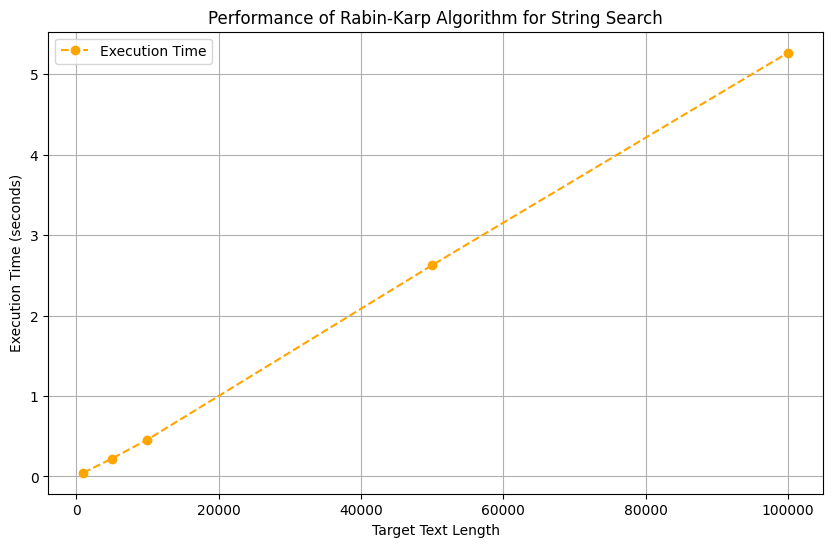

In [4]:
import time
import matplotlib.pyplot as plt

class StringSearch:
    character_set = 256  # Total number of characters in the alphabet (ASCII set)

    @staticmethod
    def rabin_karp_search(pattern, target_text, prime_modulus):
        """Perform pattern search in the target text using the Rabin-Karp algorithm."""
        pattern_length = len(pattern)  # Length of the search pattern
        text_length = len(target_text)  # Length of the target text
        pattern_hash = 0  # Hash value for the pattern
        current_window_hash = 0  # Hash value for the current sliding window in the text
        multiplier = 1  # Precomputed multiplier for hash calculation

        # Precompute the multiplier value for character_set^(M-1) % prime_modulus
        for _ in range(pattern_length - 1):
            multiplier = (multiplier * StringSearch.character_set) % prime_modulus

        # Calculate the initial hash values for the pattern and the first window of the text
        for i in range(pattern_length):
            pattern_hash = (StringSearch.character_set * pattern_hash + ord(pattern[i])) % prime_modulus
            current_window_hash = (StringSearch.character_set * current_window_hash + ord(target_text[i])) % prime_modulus

        # Start sliding the pattern over the target text
        match_locations = []
        for i in range(text_length - pattern_length + 1):
            # Compare hash values
            if pattern_hash == current_window_hash:
                # Verify actual characters if hash matches
                if target_text[i:i + pattern_length] == pattern:
                    match_locations.append(i)

            # Compute the hash for the next window in the text
            if i < text_length - pattern_length:
                current_window_hash = (
                    StringSearch.character_set *
                    (current_window_hash - ord(target_text[i]) * multiplier) +
                    ord(target_text[i + pattern_length])
                ) % prime_modulus

                # Ensure the hash remains positive
                if current_window_hash < 0:
                    current_window_hash += prime_modulus

        return match_locations


# Benchmark and evaluate the Rabin-Karp algorithm
if __name__ == "__main__":
    search_term = "string"  # Pattern to search for
    text_lengths = [1000, 5000, 10000, 50000, 100000]  # Different sizes of target text for benchmarking
    processing_times = []

    # Fixed base text for consistent benchmarking
    base_text_snippet = "string search algorithms are essential for text processing and pattern recognition tasks. "

    for length in text_lengths:
        # Generate the target text by repeating the base_text_snippet
        target_text = base_text_snippet * length

        # Measure the time taken to search for the pattern
        start_time = time.time()
        StringSearch.rabin_karp_search(search_term, target_text, 101)
        end_time = time.time()

        processing_times.append(end_time - start_time)

    # Display the benchmark results
    for length, time_taken in zip(text_lengths, processing_times):
        print(f"Text Length: {length} - Execution Time: {time_taken:.6f} seconds")

    # Plot the performance graph
    plt.figure(figsize=(10, 6))
    plt.plot(text_lengths, processing_times, marker='o', linestyle='--', color='orange', label='Execution Time')
    plt.title('Performance of Rabin-Karp Algorithm for String Search')
    plt.xlabel('Target Text Length')
    plt.ylabel('Execution Time (seconds)')
    plt.grid()
    plt.legend()
    plt.show()

